                 2021      2022
[0.0 - 1.0]  0.000186  0.000198
(1.0-3.0]    0.018579  0.014738
(3.0-5.0]    0.139988  0.144010
(5.0-8.0]    0.748541  0.724467
(8.0-9.0)    0.078909  0.091976
[9.0-]       0.013797  0.024612


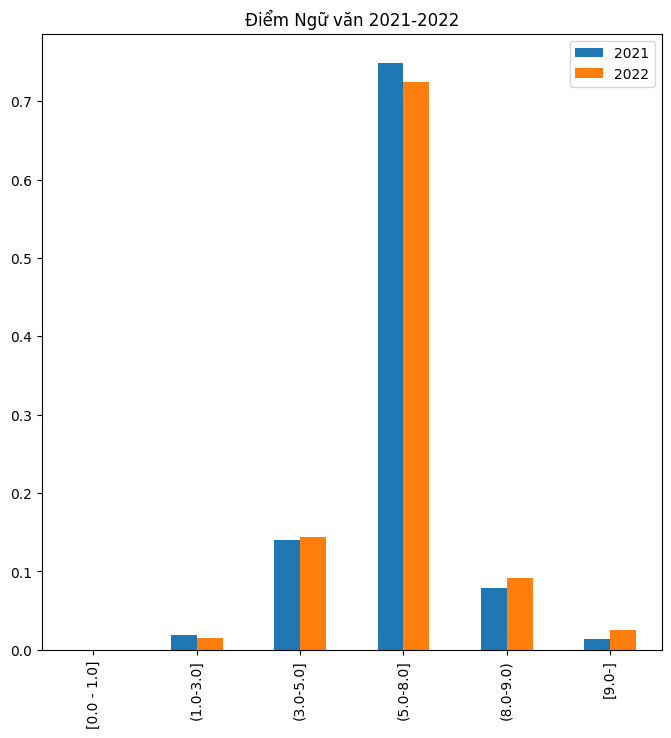

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
desired_width = 320
pd.set_option('display.width', desired_width)

# ---------------------------------------------------------------------------------------------------------------#
# Xoá cột rỗng: "Tên", "Ngày Sinh", "Giới tính"
diem_2021_df = pd.read_csv('DATA_2021.csv', low_memory=False)
diem_2021_df = diem_2021_df.drop(diem_2021_df.columns[[1, 2, 3]], axis=1)

# Chuẩn hoá tên các môn học
diem_2021_df = diem_2021_df.rename(columns={'Văn': 'Ngữ văn', 'Lý': 'Vật lý', 'Hoá': 'Hoá học', 'Sinh': 'Sinh học',
                                            'Lịch Sử': 'Lịch sử', 'Địa Lý': 'Địa lý', 'Ngoại Ngữ': 'Ngoại ngữ'})

# Tính điểm tổ hợp "KHTN" & "KHXH"
diem_2021_df['KHTN'] = round(
    (diem_2021_df['Vật lý'] + diem_2021_df['Hoá học'] + diem_2021_df['Sinh học']) / 3, 2)
diem_2021_df['KHXH'] = round(
    (diem_2021_df['Lịch sử'] + diem_2021_df['Địa lý'] + diem_2021_df['GDCD']) / 3, 2)

# Tạo cột "Tỉnh thành" dựa trên SBD
temp = {
    '1': 'TP HÀ NỘI', '2': 'TP HỒ CHÍ MINH', '3': 'TP HẢI PHÒNG', '4': 'TP ĐÀ NẴNG', '5': 'HÀ GIANG',
    '6': 'CAO BẰNG', '7': 'LAI CHÂU', '8': 'LÀO CAI', '9': 'TUYÊN QUANG', '10': 'LẠNG SƠN',
    '11': 'BẮC KẠN', '12': 'THÁI NGUYÊN', '13': 'YÊN BÁI', '14': 'SƠN LA', '15': 'PHÚ THỌ',
    '16': 'VĨNH PHÚC', '17': 'QUẢNG NINH', '18': 'BẮC GIANG', '19': 'BẮC NINH',
    '21': 'HẢI DƯƠNG', '22': 'HƯNG YÊN', '23': 'HÒA BÌNH', '24': 'HÀ NAM',
    '25': 'NAM ĐỊNH', '26': 'THÁI BÌNH', '27': 'NINH BÌNH', '28': 'THANH HÓA',
    '29': 'NGHỆ AN', '30': 'HÀ TĨNH',
    '31': 'QUẢNG BÌNH', '32': 'QUẢNG TRỊ', '33': 'THỪA THIÊN - HUẾ', '34': 'QUẢNG NAM',
    '35': 'QUẢNG NGÃI', '36': 'KON TUM', '37': 'BÌNH ĐỊNH', '38': 'GIA LAI',
    '39': 'PHÚ YÊN', '40': 'ĐẮK LẮK',
    '41': 'KHÁNH HÒA', '42': 'LÂM ĐỒNG', '43': 'BÌNH PHƯỚC', '44': 'BÌNH DƯƠNG',
    '45': 'NINH THUẬN', '46': 'TÂY NINH', '47': 'BÌNH THUẬN', '48': 'ĐỒNG NAI',
    '49': 'LONG AN', '50': 'ĐỒNG THÁP',
    '51': 'AN GIANG', '52': 'BÀ RỊA', '53': 'TIỀN GIANG', '54': 'KIÊN GIANG',
    '55': 'TP CẦN THƠ', '56': 'BẾN TRE', '57': 'VĨNH LONG', '58': 'TRÀ VINH', '59': 'SÓC TRĂNG',
    '60': 'BẠC LIÊU',
    '61': 'CÀ MAU', '62': 'ĐIỆN BIÊN', '63': 'ĐĂK NÔNG', '64': 'HẬU GIANG'
}
location = []
location = np.floor(diem_2021_df['SBD'] // 10 ** 6)
location = location.astype(int)

tinhThanh = []
for i in range(len(location)):
    tmp = str(location[i])
    tinhThanh.append(temp.get(tmp))
diem_2021_df['Tỉnh thành'] = tinhThanh

# Chuyển cột "Tỉnh thành" từ cuối lên sau cột "SBD"
column_to_move = diem_2021_df.pop('Tỉnh thành')
diem_2021_df.insert(1, 'Tỉnh thành', column_to_move)

# -----------------------------------------------------------------------------------------------------------------#

diem_2022_df = pd.read_csv('DATA_2022.csv', low_memory=False)

diem_2022_df = diem_2022_df.rename(
    columns={'sbd': 'SBD', 'ngu_van': 'Ngữ văn', 'toan': 'Toán', 'ngoai_ngu': 'Ngoại ngữ', 'vat_li': 'Vật lý',
             'hoa_hoc': 'Hoá học', 'sinh_hoc': 'Sinh học', 'lich_su': 'Lịch sử', 'dia_li': 'Địa lý', 'gdcd': 'GDCD'})
diem_2022_df['KHTN'] = round(
    (diem_2022_df['Hoá học'] + diem_2022_df['Vật lý'] + diem_2022_df['Sinh học']) / 3, 2)
diem_2022_df['KHXH'] = round(
    (diem_2022_df['Địa lý'] + diem_2022_df['Lịch sử'] + diem_2022_df['GDCD']) / 3, 2)

temp = {
    '1': 'TP HÀ NỘI', '2': 'TP HỒ CHÍ MINH', '3': 'TP HẢI PHÒNG', '4': 'TP ĐÀ NẴNG', '5': 'HÀ GIANG',
    '6': 'CAO BẰNG', '7': 'LAI CHÂU', '8': 'LÀO CAI', '9': 'TUYÊN QUANG', '10': 'LẠNG SƠN',
    '11': 'BẮC KẠN', '12': 'THÁI NGUYÊN', '13': 'YÊN BÁI', '14': 'SƠN LA', '15': 'PHÚ THỌ',
    '16': 'VĨNH PHÚC', '17': 'QUẢNG NINH', '18': 'BẮC GIANG', '19': 'BẮC NINH',
    '21': 'HẢI DƯƠNG', '22': 'HƯNG YÊN', '23': 'HÒA BÌNH', '24': 'HÀ NAM',
    '25': 'NAM ĐỊNH', '26': 'THÁI BÌNH', '27': 'NINH BÌNH', '28': 'THANH HÓA',
    '29': 'NGHỆ AN', '30': 'HÀ TĨNH',
    '31': 'QUẢNG BÌNH', '32': 'QUẢNG TRỊ', '33': 'THỪA THIÊN - HUẾ', '34': 'QUẢNG NAM',
    '35': 'QUẢNG NGÃI', '36': 'KON TUM', '37': 'BÌNH ĐỊNH', '38': 'GIA LAI',
    '39': 'PHÚ YÊN', '40': 'ĐẮK LẮK',
    '41': 'KHÁNH HÒA', '42': 'LÂM ĐỒNG', '43': 'BÌNH PHƯỚC', '44': 'BÌNH DƯƠNG',
    '45': 'NINH THUẬN', '46': 'TÂY NINH', '47': 'BÌNH THUẬN', '48': 'ĐỒNG NAI',
    '49': 'LONG AN', '50': 'ĐỒNG THÁP',
    '51': 'AN GIANG', '52': 'BÀ RỊA', '53': 'TIỀN GIANG', '54': 'KIÊN GIANG',
    '55': 'TP CẦN THƠ', '56': 'BẾN TRE', '57': 'VĨNH LONG', '58': 'TRÀ VINH', '59': 'SÓC TRĂNG',
    '60': 'BẠC LIÊU',
    '61': 'CÀ MAU', '62': 'ĐIỆN BIÊN', '63': 'ĐĂK NÔNG', '64': 'HẬU GIANG'
}
location = []
location = np.floor(diem_2022_df['SBD'] // 10 ** 6)
location = location.astype(int)

tinhThanh = []
for i in range(len(location)):
    tmp = str(location[i])
    tinhThanh.append(temp.get(tmp))
diem_2022_df['Tỉnh thành'] = tinhThanh

diem_2022_df = pd.DataFrame({'SBD': diem_2022_df['SBD'], 'Tỉnh thành': diem_2022_df['Tỉnh thành'], 'Toán': diem_2022_df['Toán'],
                            'Ngữ văn': diem_2022_df['Ngữ văn'], 'Vật lý': diem_2022_df['Vật lý'], 'Hoá học': diem_2022_df['Hoá học'],
                             'Sinh học': diem_2022_df['Sinh học'], 'KHTN': diem_2022_df['KHTN'], 'Lịch sử': diem_2022_df['Lịch sử'],
                             'Địa lý': diem_2022_df['Địa lý'], 'GDCD': diem_2022_df['GDCD'], 'KHXH': diem_2022_df['KHXH'], 'Ngoại ngữ': diem_2022_df['Ngoại ngữ']})

# -------------------------------------------------------------------------------------------------------------#
"""
    - Hàm PhanBoDiemThi với đầu vào là môn thi quan tâm theo hai năm 2021 và 2022
    - fig là kích thước biểu đồ mà cần hiển thị
    - Kết quả hiện thị chính là biểu đồ cột xen nhau giữa năm 2021 và 2022, được sắp xếp theo thang điểm 0-10 theo khoảng chia là chính là khả năng điểm của bài thi
    - Điểm môn Ngữ văn thì chấm tự luận nên sẽ có nhiều thang điểm vì thế sẽ nhìn nhận theo các khoảng chia cụ thể, theo cá nhân vì vậy sẽ chia như sau:
        [0.0-1.0]: điểm liệt
        [1.0-3.0]: điểm yếu
        [3.0-5.0]: trung bình
        [5.0-8.0]: điểm khá
        [8.0-9.0]: điểm giỏi
        [9.0-10]: điểm xuất sắc
"""
def PhanBoDiem(monthi, fig):
    diem2021 = diem_2021_df[monthi].value_counts() / diem_2021_df[monthi].count()  # sl điểm i/tổng sl
    diem2022 = diem_2022_df[monthi].value_counts() / diem_2022_df[monthi].count()
    diemcanuoc = pd.DataFrame({"2021": diem2021, "2022": diem2022})
    tl = "Điểm " + monthi + " 2021-2022"
    diemcanuoc.sort_index().plot.bar(figsize=fig, title=tl)

def PhanBoDiemVan(temp, thisinh_thivan):
    diemliet = sum(temp[temp.index <= 1.0]) /thisinh_thivan
    diemyeu = sum(temp[(temp.index <= 3.0) & (temp.index > 1.0)]) / thisinh_thivan
    diemtb = sum(temp[(temp.index <= 5.0) & (temp.index > 3.0)]) / thisinh_thivan
    diemkha = sum(temp[(temp.index <= 8.0) & (temp.index > 5.0)]) / thisinh_thivan
    diemgioi = sum(temp[(temp.index < 9.0) & (temp.index > 8.0)]) / thisinh_thivan
    diemxs = sum(temp[temp.index >= 9.0])/thisinh_thivan
    return pd.Series({'[0.0 - 1.0]': diemliet,'(1.0-3.0]': diemyeu,'(3.0-5.0]': diemtb,'(5.0-8.0]': diemkha, '(8.0-9.0)': diemgioi,'[9.0-]': diemxs})   

def NguVan():
    temp = diem_2021_df['Ngữ văn'].value_counts()
    thisinh_thivan = diem_2021_df['Ngữ văn'].count()
    diemvan2021 = PhanBoDiemVan(temp, thisinh_thivan)
    temp = diem_2022_df['Ngữ văn'].value_counts()
    thisinh_thivan = diem_2022_df['Ngữ văn'].count()
    diemvan2022 = PhanBoDiemVan(temp, thisinh_thivan)
    diemvan_ca_nuoc = pd.DataFrame({'2021': diemvan2021, '2022': diemvan2022})
    print(diemvan_ca_nuoc)
    diemvan_ca_nuoc.plot.bar(figsize = (8, 8), title = 'Điểm Ngữ văn 2021-2022')

def show_graph():
    monthi = input('Nhập môn học: ')
    monthi = monthi.lower().capitalize()
    if monthi != 'Ngữ văn':
        if monthi == 'Gdcd':
            monthi = 'GDCD'
        PhanBoDiem(monthi, (18, 6))
    else:
        NguVan()

show_graph()

          2021      2022
<=1   0.000000  0.000000
<=2   0.000000  0.000000
<=3   0.000000  0.000000
<=4   0.000000  0.000000
<=5   0.000003  0.000000
<=6   0.000066  0.000028
<=7   0.000189  0.000114
<=8   0.000550  0.000392
<=9   0.000833  0.000606
<=10  0.001437  0.001245
<=11  0.002386  0.002144
<=12  0.004190  0.004260
<=13  0.007186  0.007118
<=14  0.012314  0.012028
<=15  0.019001  0.018562
<=16  0.028234  0.027664
<=17  0.039907  0.039719
<=18  0.055461  0.055090
<=19  0.072739  0.073321
<=20  0.093946  0.092998
<=21  0.112911  0.111891
<=22  0.126421  0.124215
<=23  0.132609  0.127252
<=24  0.122081  0.116374
<=25  0.091635  0.090533
<=26  0.051665  0.056242
<=27  0.019094  0.027213
<=28  0.004514  0.009198
<=29  0.000601  0.001616
<=30  0.000027  0.000179


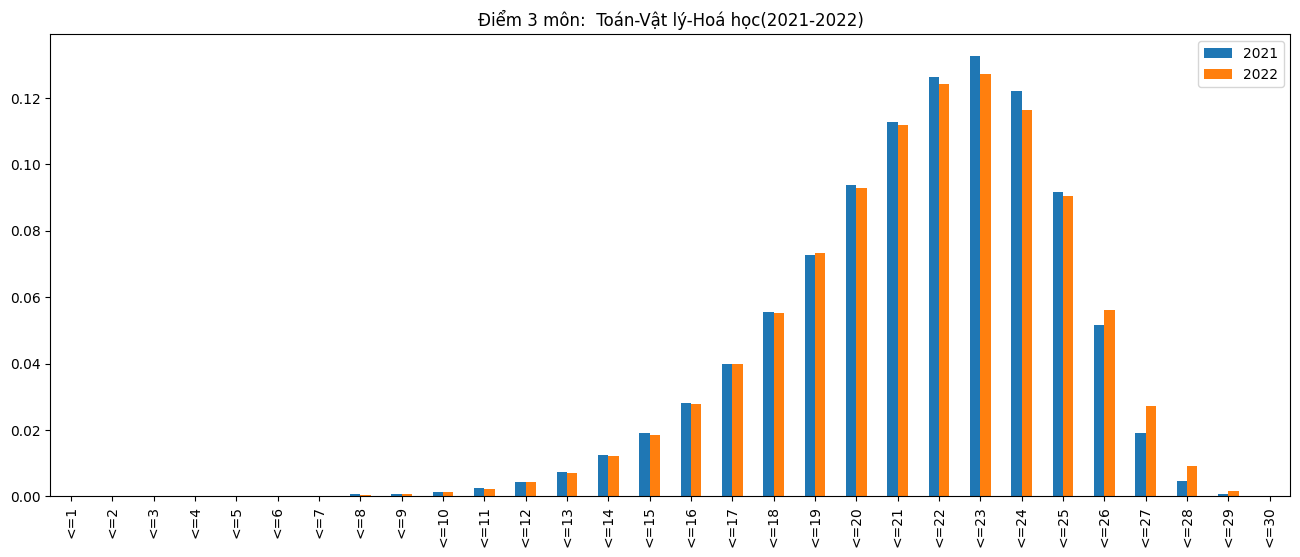

In [2]:
# Phân tích điểm thi theo khối
khoi = {
    'Khối A': ('Toán', 'Vật lý', 'Hoá học'),
    'Khối A1': ('Toán', 'Vật lý', 'Ngoại ngữ'),
    'Khối B': ('Toán', 'Hoá học', 'Sinh học'),
    'Khối C': ('Ngữ văn', 'Lịch sử', 'Địa lý'),
    'Khối D': ('Ngữ văn', 'Toán', 'Ngoại ngữ')
}

def CreateSeriesTemp(d):
    a = dict()
    for i in range(0, 30):
        keyname = '<=' + str(i + 1)
        if i == 0:
            a[keyname] = d[(d >= i) & (d <= i + 1)].count() / d.count()
        else:
            a[keyname] = d[(d > i) & (d <= i + 1)].count() / d.count()

    return pd.Series(a)

def ChiaKhoang(k, fig):
    mon1, mon2, mon3 = k[0], k[1], k[2]
    diem3mon2021 = (diem_2021_df[mon1] + diem_2021_df[mon2] + diem_2021_df[mon3]).copy()
    diem3mon2021.dropna(inplace = True)
    diem3mon2022 = (diem_2022_df[mon1] + diem_2022_df[mon2] + diem_2022_df[mon3]).copy()
    diem3mon2022.dropna(inplace = True)
    nam2021 = CreateSeriesTemp(diem3mon2021)
    nam2022 = CreateSeriesTemp(diem3mon2022)
    diem_theo_khoi = pd.DataFrame({'2021': nam2021, '2022': nam2022})
    print(diem_theo_khoi)
    tl = 'Điểm 3 môn: ' + ' ' + mon1 + '-' + mon2 + '-' + mon3 + '(2021-2022)'
    diem_theo_khoi.plot.bar(figsize = fig, title = tl)

k = khoi[input('Nhập khối: ')]
ChiaKhoang(k, (16, 6))
